<a href="https://colab.research.google.com/github/njonge-nathan/Moringa_WEEK6_IP_NATHAN_NJONGE_SUPERVISED_MACHINE_LEARNING/blob/main/Copy_of_WEEK6_IP_NJONGE_NATHAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - WEEK6-IP

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.


A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly(include rank in your training)

### b) Defining the Metric for Success

### c)Understanding the context

### d)Recording the Experimental Design

### e)Data Relevance

## 2)Reading the Data

In [109]:
# import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


# load our dataset
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

## 3)Checking the Data

In [110]:
# Determining the no of records in ranking 
ranking.shape

(57793, 16)

In [111]:
# Determining the no of records in results
results.shape

(40839, 9)

In [112]:
# previewing the top of ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [113]:
# count of country in ranking dataset
n = len(pd.unique(ranking['country_full']))
print('number of unique values:',n)

number of unique values: 216


In [114]:
# previewing the top of results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [115]:
# rename country_full column in ranking
ranking.rename(columns={'country_full':'country'}, inplace=True)

In [116]:
# count of unique countrys in results
n = len(pd.unique(results['country']))
print('Count of unique countrys:',n)

Count of unique countrys: 266


In [117]:
# merge the two dataframes using an inner join
football = pd.merge(ranking,results, how='inner', on=['country','country'])


In [118]:
# previewing our merged dataset
football.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


In [119]:
# view the shape of our merged dataset
football.shape

(10246510, 24)

In [120]:
# generate a random home team
import random
random.seed(100)
print('random home team', random.choices(football.home_team, k = 1))

random home team ['France']


In [121]:
# generate a random away team
random.seed(2)
print('random away team', random.choices(football.away_team, k=1))

random away team ['Slovakia']


In [122]:
# create a dataframe for the two teams
team_1 = 'France'
team_2 = 'Slovakia'
football_teams = football.loc[(football['home_team'] == team_1) | (football['away_team'] == team_2)]
football_teams.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
74,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1939-12-03,Germany,Slovakia,3,1,Friendly,Chemnitz,False
85,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1941-12-07,Germany,Slovakia,4,0,Friendly,Breslau,False
341,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2001-05-29,Germany,Slovakia,2,0,Friendly,Bremen,False
423,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-13,France,Switzerland,0,0,FIFA World Cup,Stuttgart,True
438,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-18,France,South Korea,1,1,FIFA World Cup,Leipzig,True


In [123]:
#checking unique types of tournaments
football_teams.tournament.unique()

array(['Friendly', 'FIFA World Cup', 'UEFA Euro qualification',
       'FIFA World Cup qualification', 'UEFA Euro', 'Tournoi de France',
       'Confederations Cup', 'UEFA Nations League',
       'King Hassan II Tournament', 'Kirin Cup',
       'United Arab Emirates Friendship Tournament', "King's Cup",
       'Cyprus International Tournament'], dtype=object)

In [124]:
# create a dataframe with 3 tournament types only
tournament_type1 = 'Friendly'
tournament_type2 = 'FIFA World Cup'
tournament_type3 = 'UEFA Euro qualification'
foot_teams = football_teams.loc[(football_teams['tournament'] == tournament_type1) | 
                                (football_teams['tournament'] == tournament_type2) | 
                                (football_teams['tournament'] == tournament_type3)]
foot_teams.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
74,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1939-12-03,Germany,Slovakia,3,1,Friendly,Chemnitz,False
85,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1941-12-07,Germany,Slovakia,4,0,Friendly,Breslau,False
341,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2001-05-29,Germany,Slovakia,2,0,Friendly,Bremen,False
423,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-13,France,Switzerland,0,0,FIFA World Cup,Stuttgart,True
438,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-18,France,South Korea,1,1,FIFA World Cup,Leipzig,True


In [125]:
# check for shape
foot_teams.shape

(135486, 24)

In [126]:
# checking whether each column has an appropriate dtype
foot_teams.dtypes


rank                         int64
country                     object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
neutral                       bool
dtype: object

In [127]:
# basic descriptive statistics
foot_teams.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000,135486.000000
mean,17.091950,286.598603,745.460608,0.032690,147.653381,147.653381,143.398163,71.699192,133.465954,40.040046,136.030772,27.206263,1.884342,1.185539
std,25.623209,468.154081,415.656839,3.164266,252.420107,252.420107,247.766817,123.883595,225.428348,67.628851,228.042358,45.608674,1.580857,1.272572
min,1.000000,0.000000,0.000000,-52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,552.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.000000,0.000000,809.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,18.000000,832.755000,1007.000000,1.000000,290.760000,290.760000,290.760000,145.380000,292.780000,87.830000,357.020000,71.400000,3.000000,2.000000
max,208.000000,1775.030000,1920.000000,77.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000,10.000000,6.000000


## 4)External Data Source Validation

Making sure your data matches something outside of the dataset is very important .It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

a) Validation

## 5) Tidying the Dataset

Text(0.5, 1.0, 'Boxplot of home_score')

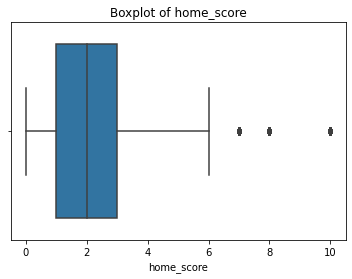

In [128]:
# checking for outliers on home_score
# 
sns.boxplot(foot_teams['home_score']).set_title("Boxplot of home_score")

We ignore the outliers as those reflect the moments the home team scored more than 7 goals

Text(0.5, 1.0, 'Boxplot of away score')

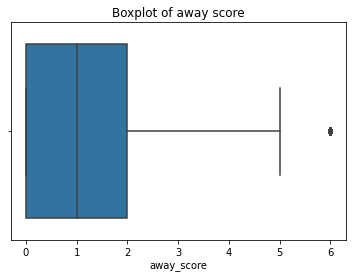

In [129]:
# checking for outliers on home score

sns.boxplot(foot_teams["away_score"]).set_title("Boxplot of away score")

We ignore the outliers as those reflect when the away team score is more than 6 goals

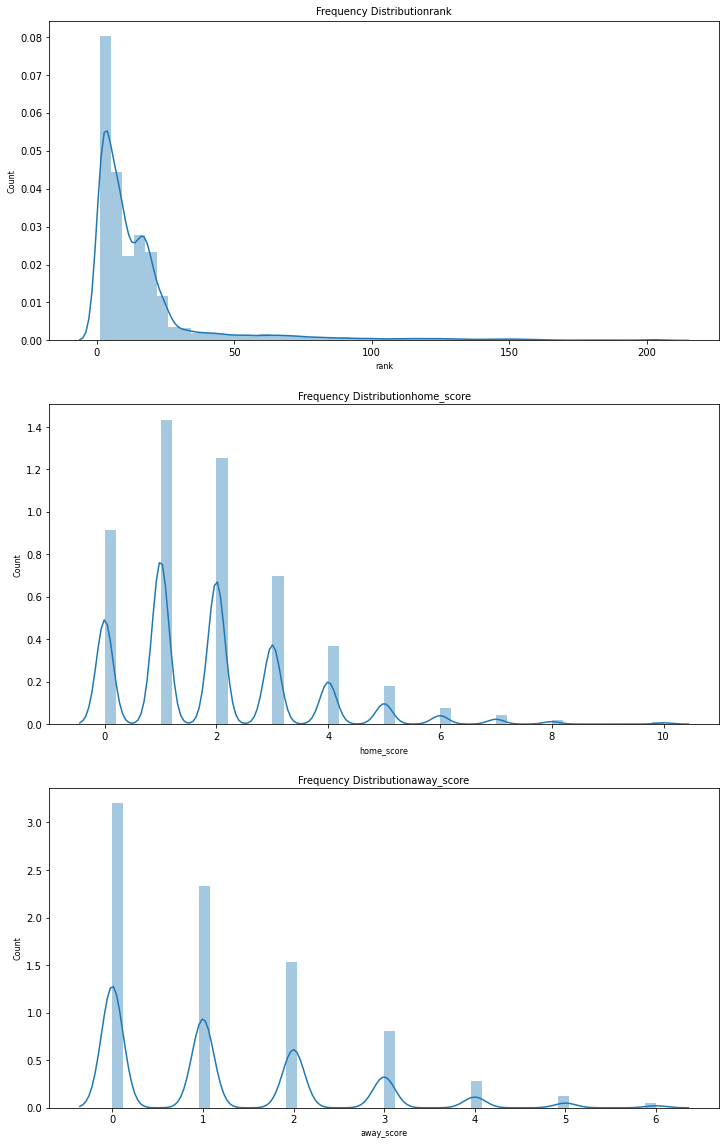

In [130]:
# checking for anomalies

import matplotlib.pyplot as plt

column_names = ['rank','home_score','away_score']

fig, ax = plt.subplots(len(column_names), figsize=(12,20))

for i, col_val in enumerate(column_names):

  sns.distplot(foot_teams[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Frequency Distribution' + col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize=8)
plt.show()

From our Distplot we can see that our visualization is skewed to the right

In [131]:
# identifying the missing data
foot_teams.isnull().values.any()

False

There is no missing values in our dataset

## 6) Exploratory Analysis



#### 1)Measures of Central Tendency




In [132]:
# mean
teams_mean = foot_teams[['rank','home_score','away_score']].mean() 
teams_mean

rank          17.091950
home_score     1.884342
away_score     1.185539
dtype: float64

The mean for the football teams rank was 17

The mean for the home teams score was 2

The mean for the away teams score was 1

In [133]:
# median
teams_median = foot_teams[['rank','home_score','away_score']].median()
teams_median

rank          9.0
home_score    2.0
away_score    1.0
dtype: float64

The median for the fooball teams rank was 9

The median for the football teams home score was 2

The median for the football teams away score was 1

In [134]:
# mode

teams_mode  = foot_teams[['rank','home_score','away_score']].mode()
teams_mode

,rank,home_score,away_score
0,2,1,0


The mode for the football teams rank was 2

The mode for the football teams home score was 1

The mode for the football teams away score was 0




#### 2)Measures of Dispersion



In [135]:
# variance
teams_var = foot_teams[['rank','home_score','away_score']].var()
teams_var

rank          656.548861
home_score      2.499108
away_score      1.619441
dtype: float64

The variance for the football teams rank was 656.55

The variance for the football teams home score was 2.5

The variance for the football teams away score was 1.62

In [136]:
# Standard deviation
teams_std = foot_teams[['rank','home_score','away_score']].std()
teams_std

rank          25.623209
home_score     1.580857
away_score     1.272572
dtype: float64

The standard deviation for the football teams rank was 25.62

The standard deviation for the football teams home score was 1.58

The standard deviation for the football teams away score was 1.27

In [137]:
# Range of ranks
max_rank = foot_teams['rank'].max()
min_rank = foot_teams['rank'].min()

max_rank - min_rank

207

The range between the ranks is 207

In [138]:
# range of home score
max_homscore = foot_teams['home_score'].max()
min_homscore = foot_teams['home_score'].min()

max_homscore - min_homscore

10

The range between the maximum home score and minimum home score is 10

In [139]:
# Range of away_score
max_awascore = foot_teams['away_score'].max()
min_awascore = foot_teams['away_score'].min()

max_awascore - min_awascore

6

The range between the maximum away score and minimum away score is 6

In [140]:
# Interquartile range for home score

Q3 = foot_teams['home_score'].quantile(0.75)
Q1 = foot_teams['home_score'].quantile(0.25)

Q3 -Q1

2.0

The interquartile range for the home score is 2

In [141]:
# Interquartile range for away score

Q3 = foot_teams['away_score'].quantile(0.75)
Q1 = foot_teams['away_score'].quantile(0.25)

Q3 - Q1

2.0

The interquartile range for the away score is 2

In [142]:
# Interquartile range for teams rank

Q3 = foot_teams['rank'].quantile(0.75)
Q1 = foot_teams['rank'].quantile(0.25)

Q3 -Q1

15.0

The Interquartile range for the teams rank is 15

In [143]:
# kurtosis

team_kurtosis = foot_teams[['away_score','home_score','rank']].kurt()
team_kurtosis

away_score     1.014598
home_score     2.227778
rank          15.198892
dtype: float64

The kurtosis for the teams away score is 1.01

The kurtosis for the teams home score is 2.23

The kurtosis for the teams rank is 15.2

In [144]:
# skewness

teams_skewness = foot_teams[['rank','home_score','away_score']].skew()
teams_skewness

rank          3.578392
home_score    1.216907
away_score    1.122610
dtype: float64

The skewness for the teams rank is 3.58

The skewness for the teams home score is 1.22

The skewness for the teams away score is 1.12

#### 3)Visualizations

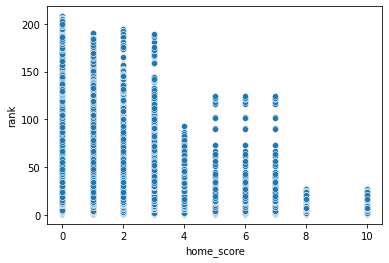

In [145]:
# Scatter plot of rankings of home scores
sns.scatterplot(x=foot_teams['home_score'], y=foot_teams['rank'])

From our scatter plot we can see that teams with higher home score 8 and 10 have a higher ranking compared to teams with a lower home score 0 and 2 which have a lower ranking

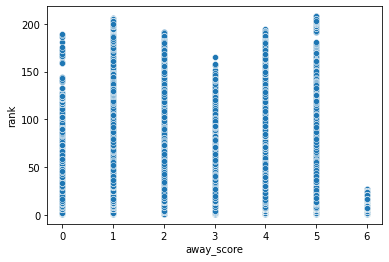

In [146]:
# scatter plot of rankings vs away scores
sns.scatterplot(x=foot_teams['away_score'],y=foot_teams['rank'])

From our scatter plot we can see that teams with an away score of 6 have a higher ranking compared to teams with a score of 0

(array([52046., 37975.,     0., 24882.,     0., 13156.,  4576.,     0.,
         1993.,   858.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

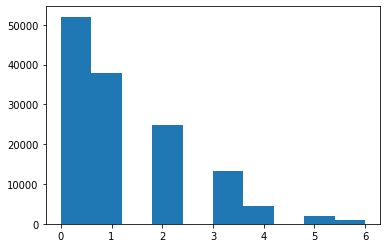

In [147]:
# Histogram of away scores
plt.hist(foot_teams['away_score'])

From our visualization we can see that the away score is skewed to the right

(array([24840., 38887., 34034., 18855., 10004.,  4862.,  2002.,  1144.,
          572.,   286.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

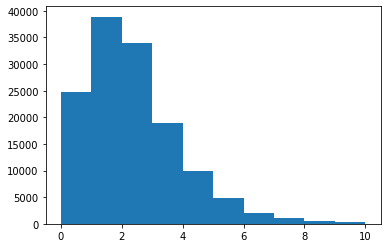

In [148]:
# Histogram of home scores
plt.hist(foot_teams['home_score'])

From our visualization we can see thay the home score is skewed to the right

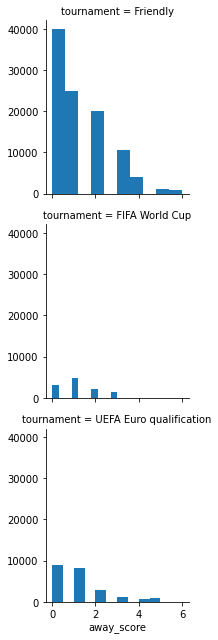

In [149]:
# Histogram of the away teams scores grouped by tournament
g = sns.FacetGrid(foot_teams, row= 'tournament')
g = g.map(plt.hist,'away_score')
plt.show()

From our visualization we can derive that more away scores came from Friendly tournaments and EUEFA Euro qualifications

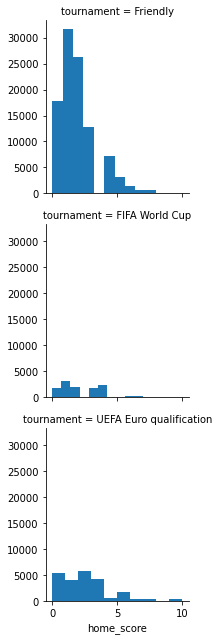

In [150]:
# Histogram of the home teams scores grouped by tournament
g = sns.FacetGrid(foot_teams, row= 'tournament')
g = g.map(plt.hist,'home_score')
plt.show()

From our visualization we can derive that more home scores came from Friendly and UEFA Euro qualification tournaments

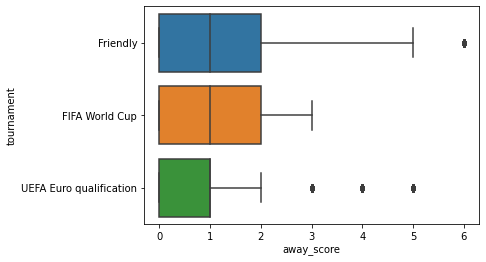

In [151]:
# Boxplot plotted by groups
# plotting away score grouped by tournament
sns.boxplot(x = foot_teams['away_score'], y = foot_teams['tournament'])
plt.show()

From our visualization we can derive that the highest away scores were from friendly tournaments

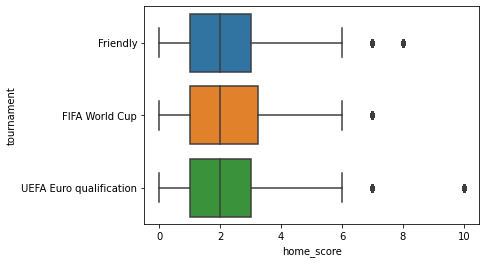

In [152]:
# plotting home scores grouped by tournament
sns.boxplot(x = foot_teams['home_score'], y = foot_teams['tournament'])

plt.show()

From our visualizations we can derive that more home scores came from UEFA Euro qualification

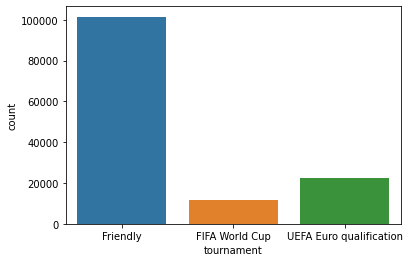

In [153]:
# Barchart
sns.countplot(foot_teams['tournament'])

From our barchart we can derive that Friendly tournaments had a higher count then followed by UEFA Euro qualification then finally the FIFA World Cup tournaments

([<matplotlib.patches.Wedge at 0x7fdcdf6d3ad0>,
 [Text(-0.7795560166848083, -0.776075007232236, 'Friendly'),
  Text(0.9557497869643728, 0.5445570169574129, 'FIFA World Cup tournament'),
  Text(0.2883826416617275, 1.0615250595196535, 'UEFA Euro qualification')],
 [Text(-0.4252123727371681, -0.42331364030849233, '74.929'),
  Text(0.5213180656169306, 0.2970311001585888, '16.628'),
  Text(0.15729962272457862, 0.5790136688289018, '8.444')])

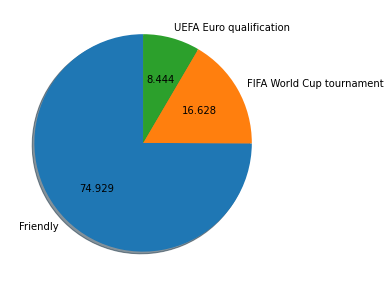

In [154]:
# Piechart
# plotting a piechart of the tournaments
plt.figure(figsize=(5,5))
plt.pie(foot_teams['tournament'].value_counts(),startangle=90,autopct='%.3f',
        labels=['Friendly','FIFA World Cup tournament','UEFA Euro qualification'], shadow=True)

From our piechart we can derive that friendly tournaments had a higher percentage and the lowest percentage was that of UEFA Euro qualification

## 7) Implementing the Solution

In [155]:
# encoding the categorical features
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# assign numerical features and store in another column
foot_teams['tournament'] = labelencoder.fit_transform(foot_teams['tournament'])

In [156]:
foot_teams.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
74,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1939-12-03,Germany,Slovakia,3,1,1,Chemnitz,False
85,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1941-12-07,Germany,Slovakia,4,0,1,Breslau,False
341,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2001-05-29,Germany,Slovakia,2,0,1,Bremen,False
423,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-13,France,Switzerland,0,0,0,Stuttgart,True
438,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-18,France,South Korea,1,1,0,Leipzig,True


In [157]:
# finding the home teams rank
home_rank = foot_teams[['rank','home_team']]
home_rank.head()

,rank,home_team
74,1,Germany
85,1,Germany
341,1,Germany
423,1,France
438,1,France


In [162]:
# rename column to home team rank
home_rank.rename(columns={'rank':'Home_Team_Rank'}, inplace=True)
home_rank.head()

,Home_Team_Rank,home_team
74,1,Germany
85,1,Germany
341,1,Germany
423,1,France
438,1,France


In [158]:
# away teams rank
away_rank = foot_teams[['rank','away_team']]
away_rank.head()

,rank,away_team
74,1,Slovakia
85,1,Slovakia
341,1,Slovakia
423,1,Switzerland
438,1,South Korea


In [159]:
# rename column to away rank
away_rank.rename(columns={'rank':'Away_Team_Rank'}, inplace=True)
away_rank.head()

,Away_Team_Rank,away_team
74,1,Slovakia
85,1,Slovakia
341,1,Slovakia
423,1,Switzerland
438,1,South Korea


In [163]:
# concat the dataframes to be one 
teams_dmy = pd.concat([foot_teams,home_rank,away_rank],axis=1)
teams_dmy.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,Home_Team_Rank,home_team,Away_Team_Rank,away_team
74,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1939-12-03,Germany,Slovakia,3,1,1,Chemnitz,False,1,Germany,1,Slovakia
85,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1941-12-07,Germany,Slovakia,4,0,1,Breslau,False,1,Germany,1,Slovakia
341,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2001-05-29,Germany,Slovakia,2,0,1,Bremen,False,1,Germany,1,Slovakia
423,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-13,France,Switzerland,0,0,0,Stuttgart,True,1,France,1,Switzerland
438,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,2006-06-18,France,South Korea,1,1,0,Leipzig,True,1,France,1,South Korea


In [164]:
teams_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135486 entries, 74 to 10174503
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     135486 non-null  int64  
 1   country                  135486 non-null  object 
 2   country_abrv             135486 non-null  object 
 3   total_points             135486 non-null  float64
 4   previous_points          135486 non-null  int64  
 5   rank_change              135486 non-null  int64  
 6   cur_year_avg             135486 non-null  float64
 7   cur_year_avg_weighted    135486 non-null  float64
 8   last_year_avg            135486 non-null  float64
 9   last_year_avg_weighted   135486 non-null  float64
 10  two_year_ago_avg         135486 non-null  float64
 11  two_year_ago_weighted    135486 non-null  float64
 12  three_year_ago_avg       135486 non-null  float64
 13  three_year_ago_weighted  135486 non-null  float64
 14  c

In [165]:
# drop columns
teams_dmy.drop(teams_dmy.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,25,27]], axis=1, inplace=True)
teams_dmy.head()

,home_score,away_score,tournament,Home_Team_Rank,Away_Team_Rank
74,3,1,1,1,1
85,4,0,1,1,1
341,2,0,1,1,1
423,0,0,0,1,1
438,1,1,0,1,1


### POLYNOMIAL REGRESSION

MODEL 1: POLYNOMIAL APPROACH

In [180]:
# splitting the dataset
# Model 1: Predict how many goals the home team scores.
x = teams_dmy['Home_Team_Rank'].values.reshape(-1, 1)
Y = teams_dmy['home_score'].values.reshape(-1, 1)
print(x)
print(Y)

[[  1]
 [  1]
 [  1]
 ...
 [132]
 [132]
 [130]]
[[3]
 [4]
 [2]
 ...
 [0]
 [0]
 [0]]


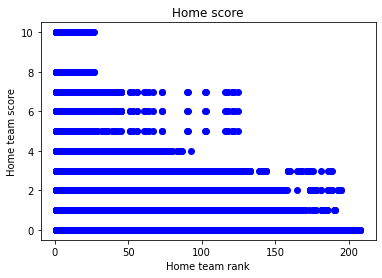

In [181]:
# plot a scatter plot of home score vs home team rank
plt.scatter(x,Y, color='blue')
plt.title('Home score')
plt.xlabel('Home team rank')
plt.ylabel('Home team score')
plt.show()

From the scatter plot with a low score one is likely to rank very low on the other hand with a high score one ranks high

In [182]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(x,Y, test_size = 0.2, random_state=0)

In [183]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(x)

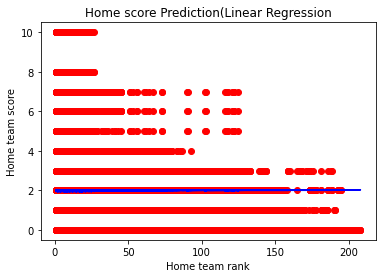

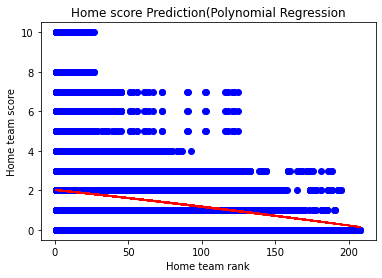

In [195]:
# Fit Linear Regression model to the dataset
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

reg_line = LinearRegression()
reg_line.fit(x,Y)

# Visualize the Linear Regression results
plt.scatter(x, Y, color='red') 
plt.plot(x, reg_line.predict(Y), color='blue')
plt.title('Home score Prediction(Linear Regression')
plt.xlabel('Home team rank')
plt.ylabel('Home team score')
plt.show()

pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

#Visualize the Polynomial Regression results
plt.scatter(x, Y, color='blue') 
plt.plot(x, pol_reg.predict(X_poly), color='red')
plt.title('Home score Prediction(Polynomial Regression')
plt.xlabel('Home team rank')
plt.ylabel('Home team score')
plt.show()


From our polynomial plot home team is likely to score 2 goals or less based on their ranking

Predictions

In [196]:
# Predict using Linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[5.5]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


From our analysis it is likely that the home score is going to be atleast one based on the home teams rank

MODEL 2 - POLYNOMIAL APPROACH

In [197]:
# splitting the dataset
# Model 2: Predict how many goals the away team scores.
x1 = teams_dmy['Away_Team_Rank'].values.reshape(-1, 1)
Y1 = teams_dmy['away_score'].values.reshape(-1, 1)
print(x1)
print(Y1)

[[  1]
 [  1]
 [  1]
 ...
 [132]
 [132]
 [130]]
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


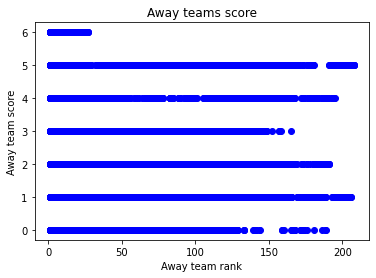

In [198]:
# plot a scatter plot of away teams score vs away teams rank
plt.scatter(x1,Y1, color='blue')
plt.title('Away teams score')
plt.xlabel('Away team rank')
plt.ylabel('Away team score')
plt.show()

From the plot we can see that with a high score the away teams rank is high

In [200]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(x1,Y1, test_size = 0.2, random_state=0)

In [202]:
# Fit polynomial Regression to the dataset
poly_reg_1 = PolynomialFeatures(degree = 6) 
X_poly_1 = poly_reg.fit_transform(x1)

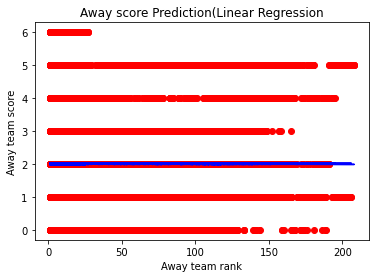

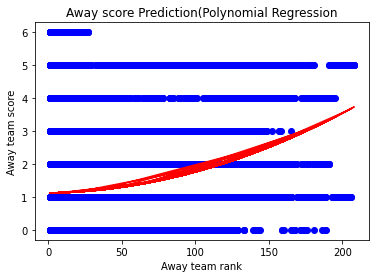

In [212]:
# Fit Linear Regression model to the dataset

reg_line_1 = LinearRegression()
reg_line_1.fit(x1,Y1)

# Visualize the Linear Regression results
plt.scatter(x1, Y1, color='red') 
plt.plot(x1, reg_line.predict(Y1), color='blue')
plt.title('Away score Prediction(Linear Regression')
plt.xlabel('Away team rank')
plt.ylabel('Away team score')
plt.show()

pol_reg_1 = LinearRegression()
pol_reg_1.fit(X_poly_1, Y1)

#Visualize the Polynomial Regression results
plt.scatter(x1, Y1, color='blue') 
plt.plot(x1, pol_reg_1.predict(X_poly_1), color='red')
plt.title('Away score Prediction(Polynomial Regression')
plt.xlabel('Away team rank')
plt.ylabel('Away team score')
plt.show()


From our visualization we can see that the away team is likely to score 2 or more goals based on the away team ranking

In [54]:
# drop unecessary columns
foot_teams.drop(foot_teams.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23]], axis=1, inplace=True)
foot_teams.head()

,rank,home_score,away_score,tournament
74,1,3,1,1
85,1,4,0,1
341,1,2,0,1
423,1,0,0,0
438,1,1,1,0


COMPUTE RMSE

In [ ]:
# split our dataset
X = foot_teams.drop('tournament',axis=1)
y = foot_teams['tournament']

In [ ]:

# train using 80% of the data
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# fit a model accordingly
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# assess the accuracy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('Accuracy:',metrics.accuracy_score(y_test,y_pred))


Mean Absolute Error: 0.2486161340320319
Mean Squared Error: 0.24868994021699017
Root Mean Squared Error: 0.4986882194487756


Our root mean squared error computed is 0.498

CROSS-VALIDATION USING KFOLDS

In [ ]:
# import our library
from sklearn.model_selection import KFold
#from sklearn.model_selection import LeaveOneOut


folds = KFold(n_splits = 5)
# print the folds we will use
print('we are using ' + str(folds.get_n_splits(X)) + 'folds')

# create and assess 4 models based on the folds we created
RMSES = [] # this array keeps track of the RMSE of each model
count = 1
for train_index, test_index in folds.split(X):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

we are using 5folds


In [ ]:
# assess the accuracy of the model
y_pred = regressor.predict(X_test)

rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSES.append(rmse_value)
  
count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

trained 2 models


0.9283875978040007

Our mean squared error is 0.9284 which is bigger than our initial 0.498


LOGISTIC REGRESSION

In [ ]:
# find optimal coefficients and intercept
regressor = LogisticRegression()
regressor.fit(X_trian, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

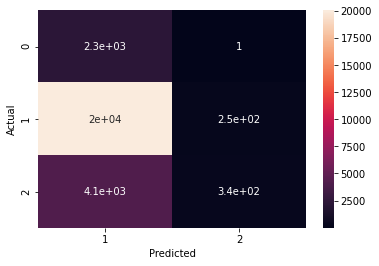

In [ ]:
# Evaluating the model
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7514207690604473


our accuracy using logistic regression is 75%

In [ ]:
# challenging our accuracy level
print(X_test)
print(y_pred)

         rank  home_score  away_score
1497217     4           4           0
9813457    19           4           1
1522324     3           2           3
871755     34           4           2
1574276     6           2           3
...       ...         ...         ...
3991472    65           0           1
1631332    15           4           0
1668362    23           1           0
1577922     5           2           1
1639819    14           3           0

[27098 rows x 3 columns]
[1 1 1 ... 1 1 1]


A team is likely to get a high rank from participating in a friendly tournamment

1 represents Friendly tournament

## 8) Challenging the solution

GRID SEARCH


In [ ]:
# Scaling our data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()

X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
# print the accuracies returned for 5 folds
print(all_accuracies.mean())

0.7338842609428415


73% accuracy

Grid Search hyperparameter tuning gives a slightly lower accuray at 73% compared to logistic regression at 75% which we had tested earlier

HYPER PARAMETER TUNING

In [ ]:
# creating the model
from sklearn import linear_model
model = linear_model.LogisticRegression()

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [ ]:
# Predicting target vector
best_model.predict(X)

array([1, 1, 1, ..., 2, 2, 2])

From our prediction a team is likely to get a higher ranking from a friendly tournament which confirms with our solution previously. 

1 represents friendly tournament